# Bitcoin Transaction Data Exploration and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# load the data 
data1 = pd.read_csv("TimetxinBlock621500.csv")
data1.columns=['index','inputs','outputs','trans_version','trans_size','trans_weight','received_time','relay_node','locktime','trans_fee','confirmed_block_height','index_block_height','confirm_time','waiting_time','feerate','enter_block_height','waiting_block_num','valid_time','valid_block_height','valid_waiting','last_block_interval']
data2 = pd.read_csv("TimetxinBlock622000.csv")
data2.columns=['index','inputs','outputs','trans_version','trans_size','trans_weight','received_time','relay_node','locktime','trans_fee','confirmed_block_height','index_block_height','confirm_time','waiting_time','feerate','enter_block_height','waiting_block_num','valid_time','valid_block_height','valid_waiting','last_block_interval']
data3 = pd.read_csv("TimetxinBlock622500.csv")
data3.columns=['index','inputs','outputs','trans_version','trans_size','trans_weight','received_time','relay_node','locktime','trans_fee','confirmed_block_height','index_block_height','confirm_time','waiting_time','feerate','enter_block_height','waiting_block_num','valid_time','valid_block_height','valid_waiting','last_block_interval']


# combine the data into one dataframe
data = pd.concat([data1, data2, data3], ignore_index = True)
# data1.columns=['index','inputs','outputs','trans_version','trans_size','trans_weight','received_time','relay_node','locktime','trans_fee','confirmed_block_height','index_block_height','confirm_time','waiting_time','feerate','enter_block_height','waiting_block_num','valid_time','valid_block_height','valid_waiting','last_block_interval']
print(data.shape)
data.head(10)



(3389593, 21)


,index,inputs,outputs,trans_version,trans_size,trans_weight,received_time,relay_node,locktime,trans_fee,...,index_block_height,confirm_time,waiting_time,feerate,enter_block_height,waiting_block_num,valid_time,valid_block_height,valid_waiting,last_block_interval
0,0,1,2,1,223,892,1583791819,0,0,2486,...,0,1583794214,2395,11.147982,620998,4,1.583792e+09,620998,2395.0,908.0
1,0,1,2,1,223,892,1583793885,0,0,2486,...,0,1583794214,329,11.147982,621001,1,1.583794e+09,621001,329.0,119.0
2,0,1,1,1,223,892,1583793700,0,0,2486,...,0,1583794214,514,11.147982,621000,2,1.583794e+09,621000,514.0,1376.0
3,0,1,2,1,223,892,1583791354,0,0,2486,...,0,1583794214,2860,11.147982,620998,4,1.583791e+09,620998,2860.0,443.0
4,0,1,2,1,223,892,1583791731,0,0,2486,...,0,1583794214,2483,11.147982,620998,4,1.583792e+09,620998,2483.0,820.0
5,0,2,2,1,371,1484,1583792024,0,0,4136,...,0,1583794214,2190,11.148248,620998,4,1.583792e+09,620998,2190.0,1113.0
6,0,2,2,1,371,1484,1583793603,0,0,4136,...,0,1583794214,611,11.148248,621000,2,1.583794e+09,621000,611.0,1279.0
7,0,2,2,1,371,1484,1583793883,0,0,4136,...,0,1583794214,331,11.148248,621001,1,1.583794e+09,621001,331.0,117.0
8,0,2,2,1,371,1484,1583791921,0,0,4136,...,0,1583794214,2293,11.148248,620998,4,1.583792e+09,620998,2293.0,1010.0
9,0,3,2,1,518,2072,1583793502,0,0,5775,...,0,1583794214,712,11.148649,621000,2,1.583794e+09,621000,712.0,1178.0


## Service time analysis 

<AxesSubplot:ylabel='Frequency'>

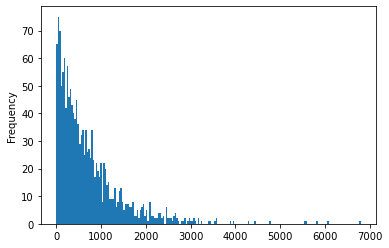

In [3]:
# Plot of inter-service time

service_time=pd.DataFrame(data.confirm_time.unique(),columns =['confirm_time'])
service_time_sorted = service_time.sort_values(by='confirm_time')
service_time_sorted.head(10)
service_time_sorted['inter_service_time']=service_time_sorted['confirm_time'].diff()
service_time_sorted['inter_service_time'].plot(kind='hist', bins=200)

### We can see that the service times (random variable) follow an exponential distribution. As the average block generation time is a fixed value (i.e.10 minutes) and the service time is independent of the previous service time, it is reasonable to assume that the service batches follow the Poisson process.


## Arrival time analysis

In [4]:
# sort the data by arrival time 

data_sorted = data.sort_values(by='received_time')
data_sorted.head(10)

,index,inputs,outputs,trans_version,trans_size,trans_weight,received_time,relay_node,locktime,trans_fee,...,index_block_height,confirm_time,waiting_time,feerate,enter_block_height,waiting_block_num,valid_time,valid_block_height,valid_waiting,last_block_interval
68058,0,4,1,2,1220,2258,1583756823,0,620940,567,...,0,1583810262,53439,1.004429,620943,89,1.583757e+09,620943,53439.0,26.0
67840,0,1,2,1,284,806,1583756865,0,0,202,...,0,1583810262,53397,1.002481,620943,89,1.583757e+09,620943,53397.0,68.0
68123,0,3,1,2,926,1736,1583756869,0,620940,436,...,0,1583810262,53393,1.004608,620943,89,1.583757e+09,620943,53393.0,72.0
16125,0,2,2,2,420,1032,1583756885,0,620942,258,...,0,1583796952,40067,1.000000,620943,64,1.583757e+09,620943,40067.0,88.0
10294,0,2,2,2,420,1032,1583756899,0,620887,258,...,0,1583796307,39408,1.000000,620943,62,1.583757e+09,620943,39408.0,102.0
67964,0,1,2,2,247,661,1583756901,0,620942,166,...,0,1583810262,53361,1.004539,620943,89,1.583757e+09,620943,53361.0,104.0
68118,0,4,2,1,667,2668,1583756912,0,0,670,...,0,1583810262,53350,1.004498,620943,89,1.583757e+09,620943,53350.0,115.0
67558,0,1,2,1,283,805,1583756927,0,0,202,...,0,1583810262,53335,1.003727,620943,89,1.583757e+09,620943,53335.0,130.0
67653,0,1,2,2,247,661,1583756972,0,620942,166,...,0,1583810262,53290,1.004539,620943,89,1.583757e+09,620943,53290.0,175.0
67866,0,1,2,1,283,805,1583757002,0,0,202,...,0,1583810262,53260,1.003727,620943,89,1.583757e+09,620943,53260.0,205.0


In [5]:
# calculate the interarrival time 

data_sorted['interarrival_time'] = data_sorted['received_time'].diff()
data_sorted.head(30)

,index,inputs,outputs,trans_version,trans_size,trans_weight,received_time,relay_node,locktime,trans_fee,...,confirm_time,waiting_time,feerate,enter_block_height,waiting_block_num,valid_time,valid_block_height,valid_waiting,last_block_interval,interarrival_time
68058,0,4,1,2,1220,2258,1583756823,0,620940,567,...,1583810262,53439,1.004429,620943,89,1.583757e+09,620943,53439.0,26.0,NaN
67840,0,1,2,1,284,806,1583756865,0,0,202,...,1583810262,53397,1.002481,620943,89,1.583757e+09,620943,53397.0,68.0,42.0
68123,0,3,1,2,926,1736,1583756869,0,620940,436,...,1583810262,53393,1.004608,620943,89,1.583757e+09,620943,53393.0,72.0,4.0
16125,0,2,2,2,420,1032,1583756885,0,620942,258,...,1583796952,40067,1.000000,620943,64,1.583757e+09,620943,40067.0,88.0,16.0
10294,0,2,2,2,420,1032,1583756899,0,620887,258,...,1583796307,39408,1.000000,620943,62,1.583757e+09,620943,39408.0,102.0,14.0
67964,0,1,2,2,247,661,1583756901,0,620942,166,...,1583810262,53361,1.004539,620943,89,1.583757e+09,620943,53361.0,104.0,2.0
68118,0,4,2,1,667,2668,1583756912,0,0,670,...,1583810262,53350,1.004498,620943,89,1.583757e+09,620943,53350.0,115.0,11.0
67558,0,1,2,1,283,805,1583756927,0,0,202,...,1583810262,53335,1.003727,620943,89,1.583757e+09,620943,53335.0,130.0,15.0
67653,0,1,2,2,247,661,1583756972,0,620942,166,...,1583810262,53290,1.004539,620943,89,1.583757e+09,620943,53290.0,175.0,45.0
67866,0,1,2,1,283,805,1583757002,0,0,202,...,1583810262,53260,1.003727,620943,89,1.583757e+09,620943,53260.0,205.0,30.0


<AxesSubplot:>

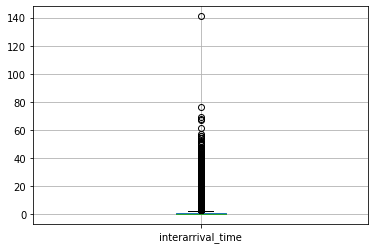

In [6]:
data_sorted.boxplot(column=['interarrival_time'])



In [7]:
stats.describe(data_sorted['interarrival_time'])

DescribeResult(nobs=3389593, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

(0.0, 20.0)

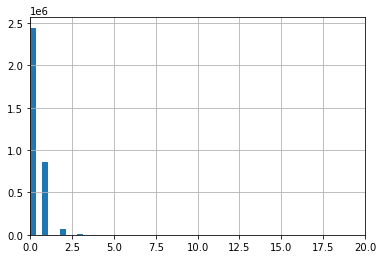

In [8]:
#original interarrival 
data_sorted['interarrival_time'].hist(bins=400)
plt.xlim(0,20)

# interarrival time should be exp(lambda), this means that it should follow an exponential distribution

## Fee rate analysis

<AxesSubplot:ylabel='Frequency'>

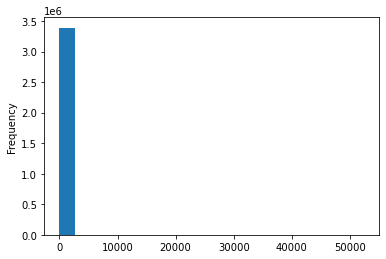

In [9]:
data_sorted['feerate'].plot(kind='hist', bins=20)


<AxesSubplot:>

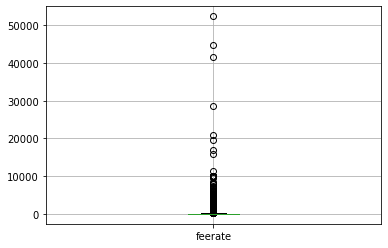

In [10]:
data_sorted.boxplot(column=['feerate'])

In [11]:
stats.describe(data_sorted['feerate'])

DescribeResult(nobs=3389593, minmax=(0.907563025210084, 52380.95238095238), mean=51.397889758916875, variance=5606.730704552561, skewness=264.57953016879827, kurtosis=148062.24244721924)

In [12]:
count = data_sorted['feerate'].value_counts()
print(count)

1.255583      27290
1.257143      27247
3.000000      21809
30.000000     19507
30.134529     19195
              ...  
107.176572        1
22.699104         1
93.118421         1
75.125874         1
15.787133         1
Name: feerate, Length: 684063, dtype: int64


## Transaction size analysis

In [13]:
data_drop = data_sorted.dropna()
stats.describe(data_drop['trans_size'])

DescribeResult(nobs=3389592, minmax=(85, 224600), mean=535.4795465058921, variance=6156405.737830308, skewness=33.81703941033508, kurtosis=1681.657850183498)

In [14]:
# batch size calculation

# using min transaciton size 
n = (1024*1024)/85
print (n)

# using average block size
n_mean = (1024*1024)/535
print(n_mean)

# using max block size
n_max = (1024*1024)/224600
print(n_max)

12336.188235294117
1959.955140186916
4.668637577916296


# Key Parameters 

## labmda 

labmda = total number of transactions / total time interval 
       = number of indexes(rows) / (last received timestamp - first received timestamp) 

mu = 1/lambda

## mu

mean service time = 10 mins - assumption
1/mu = 10 min
mu = 1/10 = 0.1 min

## block size

s = 1MB

## max numbers of transactions per block (batch)

b = s / min size per transactions 
      = 1 mb / 85 bytes (assuming bytes is the unit in the dataset)
      = 1024 * 1024 bytes / 85 bytes 
      = 12336 
      
      
##  priority groups

divided into three categories with the same number of transacitons. 

sort the transaction fees and take the top 33% as high priority and the bottom 33% as low priority.

3389593 / 3 = 

## mempool size 

300mb as a benchmark, subjec to changes when analysing overloaded scenarios
may need to lower the size. 

## timestamp


## length of the queue 

current number of transactions in the mempool 

## waiting time 

monitered variable 
write the waiting time to the dataset as a new column 


## transaction fees 

use the fee rate column in the data set. 
store it in an array or series in pandas and feed the data into the model 




